<a href="https://colab.research.google.com/github/mehrdadamini/-texas_data_set/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ive wire line log curves include gamma ray (GR), resistivity logging (ILD_log10), photoelectric effect (PE), neutron-density porosity difference and average neutron-density porosity (DeltaPHI and PHIND). Note, some wells do not have PE.
Two geologic constraining variables: nonmarine-marine indicator (NM_M) and relative position (RELPOS)
The nine discrete facies (classes of rocks) are:
1-Nonmarine sandstone
2-Nonmarine coarse siltstone
3-Nonmarine fine siltstone
4-Marine siltstone and shale
5-Mudstone (limestone)
6-Wackestone (limestone)
7-Dolomite
8-Packstone-grainstone (limestone)
9-Phylloid-algal bafflestone (limestone)

#import library we need

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from google.colab import drive

##mount google drive to 

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
!ls

gdrive	sample_data


In [6]:
%cd ./gdrive/My Drive/texas_project/-texas_data_set
!ls

/content/gdrive/My Drive/texas_project/-texas_data_set
logs  main.ipynb  training_data.csv  utilities


##import function that I wrote before

In [7]:
%cd ./logs
from log_well import *
from multywelllog import *
from lithologydisply import *
%cd ../

/content/gdrive/My Drive/texas_project/-texas_data_set/logs
/content/gdrive/My Drive/texas_project/-texas_data_set


In [8]:
%cd ./utilities
from normalise_logs import *
%cd ../

/content/gdrive/My Drive/texas_project/-texas_data_set/utilities
/content/gdrive/My Drive/texas_project/-texas_data_set


#read data from google drive

In [9]:
# directory = 'gdrive/My Drive/texas_project/-texas_data_set/'
df = pd.read_csv( 'training_data.csv')

In [10]:
wells = df.groupby('Well Name')
wells.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664000,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661000,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658000,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655000,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647000,13.500,13.300,3.400,1,0.915
471,2,A1 SH,SHANKLE,2774.5,98.360,0.642000,-0.100,18.685,2.900,1,1.000
472,2,A1 SH,SHANKLE,2775.0,97.570,0.631000,7.900,16.745,3.200,1,0.984
473,2,A1 SH,SHANKLE,2775.5,98.410,0.615000,12.800,14.105,3.200,1,0.968
474,2,A1 SH,SHANKLE,2776.0,85.920,0.597000,13.000,13.385,3.400,1,0.952
475,2,A1 SH,SHANKLE,2776.5,83.160,0.592000,12.300,13.345,3.400,1,0.935


#normal data

In [11]:
df = normalise_logs(df, 'GR', "CROSS H CATTLE")
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_NORM
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,123.532280
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,125.032919
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,126.496505
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,139.557622
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,118.215201


In [12]:
df = normalise_logs(df, 'ILD_log10', "NEWBY")
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_NORM,ILD_log10_NORM
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,123.532280,0.683723
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,125.032919,0.680271
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,126.496505,0.676820
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,139.557622,0.673369
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,118.215201,0.664166


In [13]:
df = normalise_logs(df, 'DeltaPHI', "NOLAN")
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_NORM,ILD_log10_NORM,DeltaPHI_NORM
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,123.532280,0.683723,4.802901
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,125.032919,0.680271,9.971763
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,126.496505,0.676820,10.693000
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,139.557622,0.673369,9.611145
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,118.215201,0.664166,9.130321


In [14]:
df = normalise_logs(df, 'PHIND', "NEWBY")
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_NORM,ILD_log10_NORM,DeltaPHI_NORM,PHIND_NORM
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,123.532280,0.683723,4.802901,15.017173
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,125.032919,0.680271,9.971763,16.148362
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,126.496505,0.676820,10.693000,16.992403
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,139.557622,0.673369,9.611145,17.105522
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,118.215201,0.664166,9.130321,17.427476


In [15]:
df = normalise_logs(df, 'PE', "NEWBY")
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_NORM,ILD_log10_NORM,DeltaPHI_NORM,PHIND_NORM,PE_NORM
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,123.532280,0.683723,4.802901,15.017173,4.103704
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,125.032919,0.680271,9.971763,16.148362,3.696296
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,126.496505,0.676820,10.693000,16.992403,3.288889
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,139.557622,0.673369,9.611145,17.105522,3.207407
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,118.215201,0.664166,9.130321,17.427476,3.125926


In [16]:
wells = df.groupby('Well Name')

#loogs compear

##GR LOGS FOR WELLs

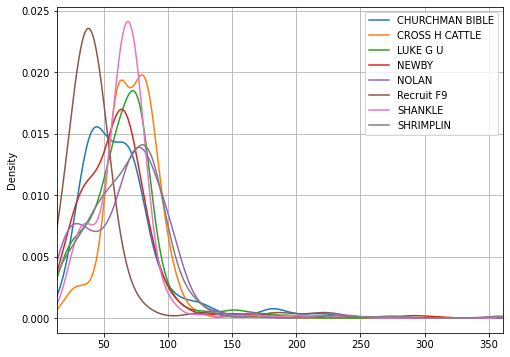

In [17]:
multywelllog(wells,'GR')

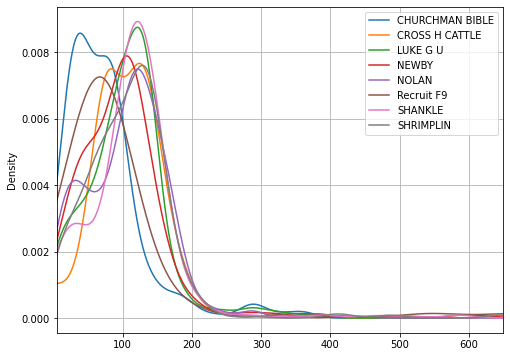

In [17]:
multywelllog(wells,'GR_NORM')

## ILD_LOG10s logs

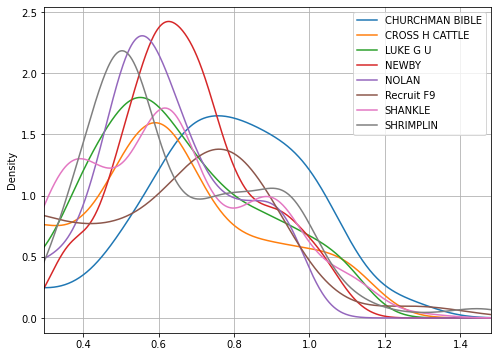

In [18]:
multywelllog(wells,'ILD_log10')

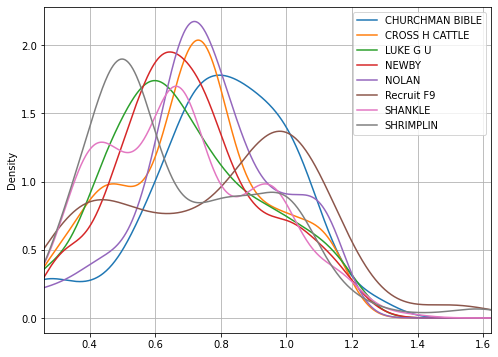

In [19]:
multywelllog(wells,'ILD_log10_NORM')

##DeltaPHI logs

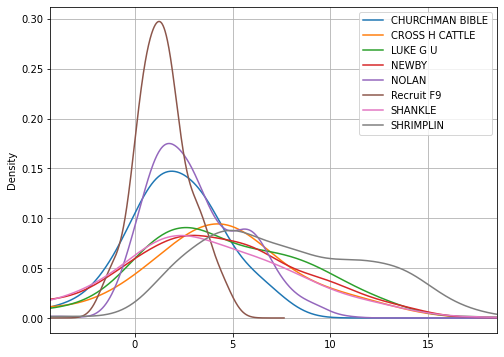

In [20]:
multywelllog(wells,'DeltaPHI')

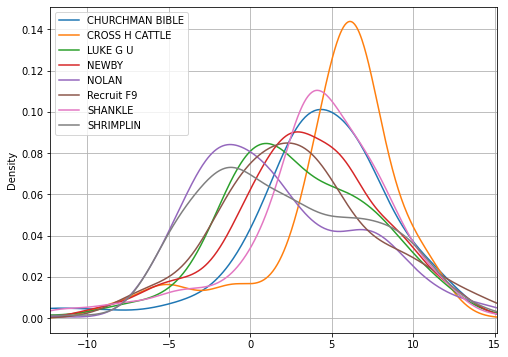

In [21]:
multywelllog(wells,'DeltaPHI_NORM')

## PHIND logs

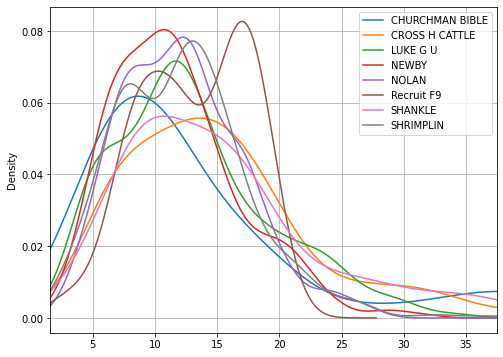

In [22]:
multywelllog(wells,'PHIND')

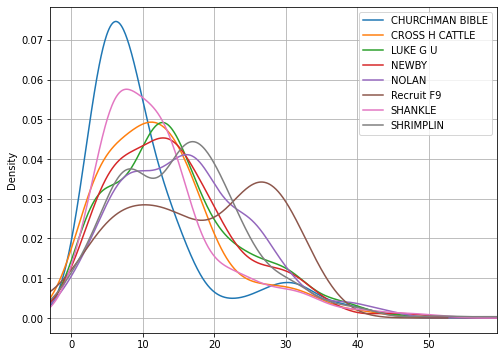

In [23]:
multywelllog(wells,'PHIND_NORM')

##PE logs

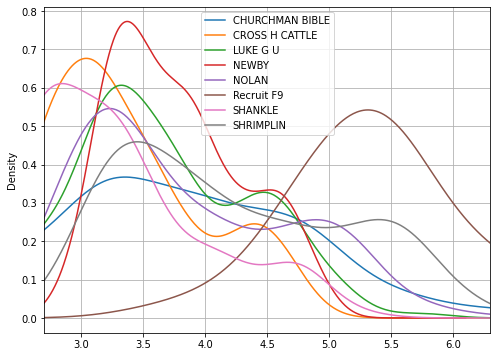

In [24]:
multywelllog(wells,'PE')

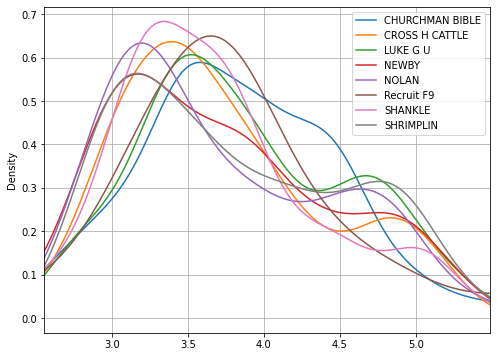

In [25]:
multywelllog(wells,'PE_NORM')

# transform categorical formation features into numerical features by labelencoder

In [18]:
le = LabelEncoder()
le.fit(df['Formation'])
df['Formation'] = le.transform(df['Formation'])
#le.inverse_transform(df['Formation'])
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_NORM,ILD_log10_NORM,DeltaPHI_NORM,PHIND_NORM,PE_NORM
0,3,1,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,123.532280,0.683723,4.802901,15.017173,4.103704
1,3,1,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,125.032919,0.680271,9.971763,16.148362,3.696296
2,3,1,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,126.496505,0.676820,10.693000,16.992403,3.288889
3,3,1,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,139.557622,0.673369,9.611145,17.105522,3.207407
4,3,1,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,118.215201,0.664166,9.130321,17.427476,3.125926


#Separate data

##separate test data

In [19]:
blind_df = wells.get_group("SHANKLE").drop(labels="Well Name", axis=1)
blind_df = blind_df.drop(labels=['Formation', 'GR','ILD_log10','DeltaPHI','PHIND','PE'], axis=1)
blind_df

,Facies,Depth,NM_M,RELPOS,GR_NORM,ILD_log10_NORM,DeltaPHI_NORM,PHIND_NORM,PE_NORM
471,2,2774.5,1,1.000,201.732645,0.688729,2.257642,15.480664,3.390244
472,2,2775.0,1,0.984,199.597735,0.677619,8.250792,13.584025,3.658537
473,2,2775.5,1,0.968,201.867766,0.661458,11.921596,11.003031,3.658537
474,2,2776.0,1,0.952,168.114570,0.643277,12.071424,10.299124,3.837398
475,2,2776.5,1,0.935,160.655897,0.638227,11.547024,10.260018,3.837398
...,...,...,...,...,...,...,...,...,...
915,8,3006.0,2,0.060,24.670242,1.171533,0.684441,0.591070,5.357724
916,8,3006.5,2,0.045,3.915674,1.163452,1.133927,0.038698,5.089431
917,8,3007.0,2,0.030,3.915674,1.163452,1.133927,0.038698,5.089431
918,4,3007.5,2,0.030,6.780237,1.143251,2.032899,0.537299,4.821138


##separate train data

In [20]:
train_set = df.loc[df['Well Name'] !='SHANKLE']
train_set = df.loc[df['Well Name'] !='Recruit F9']
train_set = train_set.drop(labels=["Well Name",'Formation', 'GR','ILD_log10','DeltaPHI','PHIND','PE'], axis=1)
train_set

,Facies,Depth,NM_M,RELPOS,GR_NORM,ILD_log10_NORM,DeltaPHI_NORM,PHIND_NORM,PE_NORM
0,3,2793.0,1,1.000,123.532280,0.683723,4.802901,15.017173,4.103704
1,3,2793.5,1,0.979,125.032919,0.680271,9.971763,16.148362,3.696296
2,3,2794.0,1,0.957,126.496505,0.676820,10.693000,16.992403,3.288889
3,3,2794.5,1,0.936,139.557622,0.673369,9.611145,17.105522,3.207407
4,3,2795.0,1,0.915,118.215201,0.664166,9.130321,17.427476,3.125926
...,...,...,...,...,...,...,...,...,...
3227,5,3120.5,2,0.685,42.843501,0.971708,4.256948,5.065754,3.744782
3228,5,3121.0,2,0.677,38.932447,0.977277,4.858190,5.694909,3.574500
3229,5,3121.5,2,0.669,48.285597,0.987488,5.853951,5.694909,3.478444
3230,5,3122.0,2,0.661,51.460153,0.988416,6.083966,5.442087,3.454742


##separate each well data

In [21]:
set1 = wells.get_group("CHURCHMAN BIBLE").drop(labels="Well Name", axis=1)
set2 = wells.get_group("CROSS H CATTLE").drop(labels="Well Name", axis=1)
set3 = wells.get_group("LUKE G U").drop(labels="Well Name", axis=1)
set4 = wells.get_group("NEWBY").drop(labels="Well Name", axis=1)
set5 = wells.get_group("NOLAN").drop(labels="Well Name", axis=1)
set6 = wells.get_group("Recruit F9").drop(labels="Well Name", axis=1)
set7 = wells.get_group("SHRIMPLIN").drop(labels="Well Name", axis=1)
test_well = wells.get_group("SHANKLE").drop(labels='Well Name', axis=1)

#display logs

##display logs for well number1

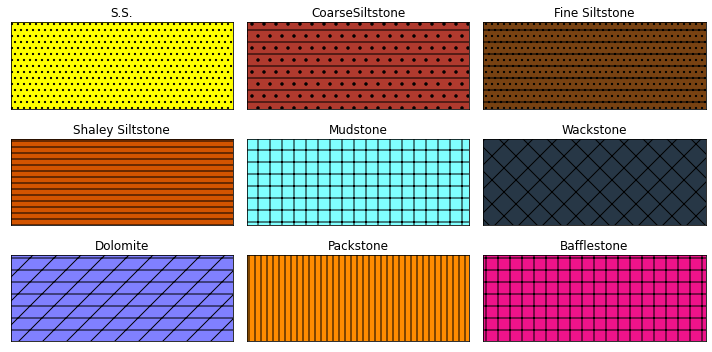

In [30]:
lithologydisply()

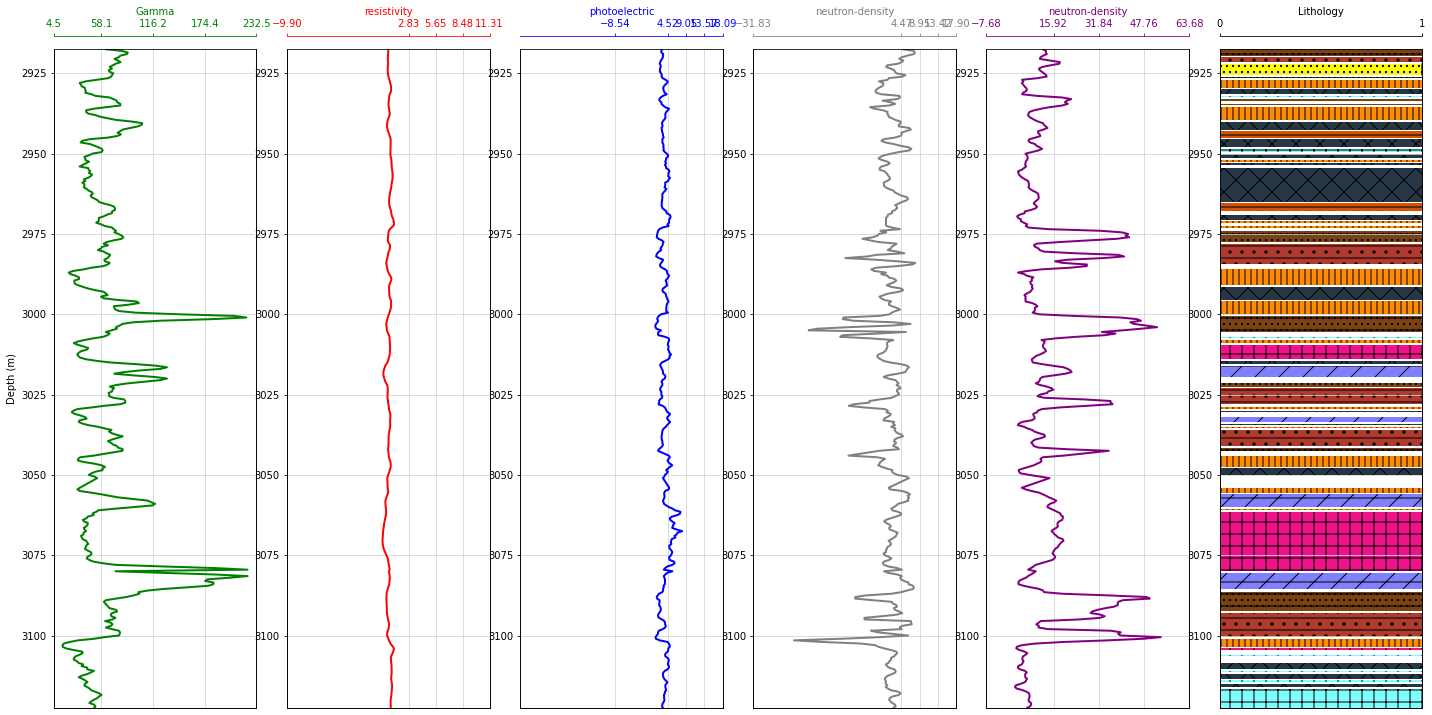

In [31]:
log_well(set1.sort_values("Depth"), set1['Depth'].min(), set1['Depth'].max())

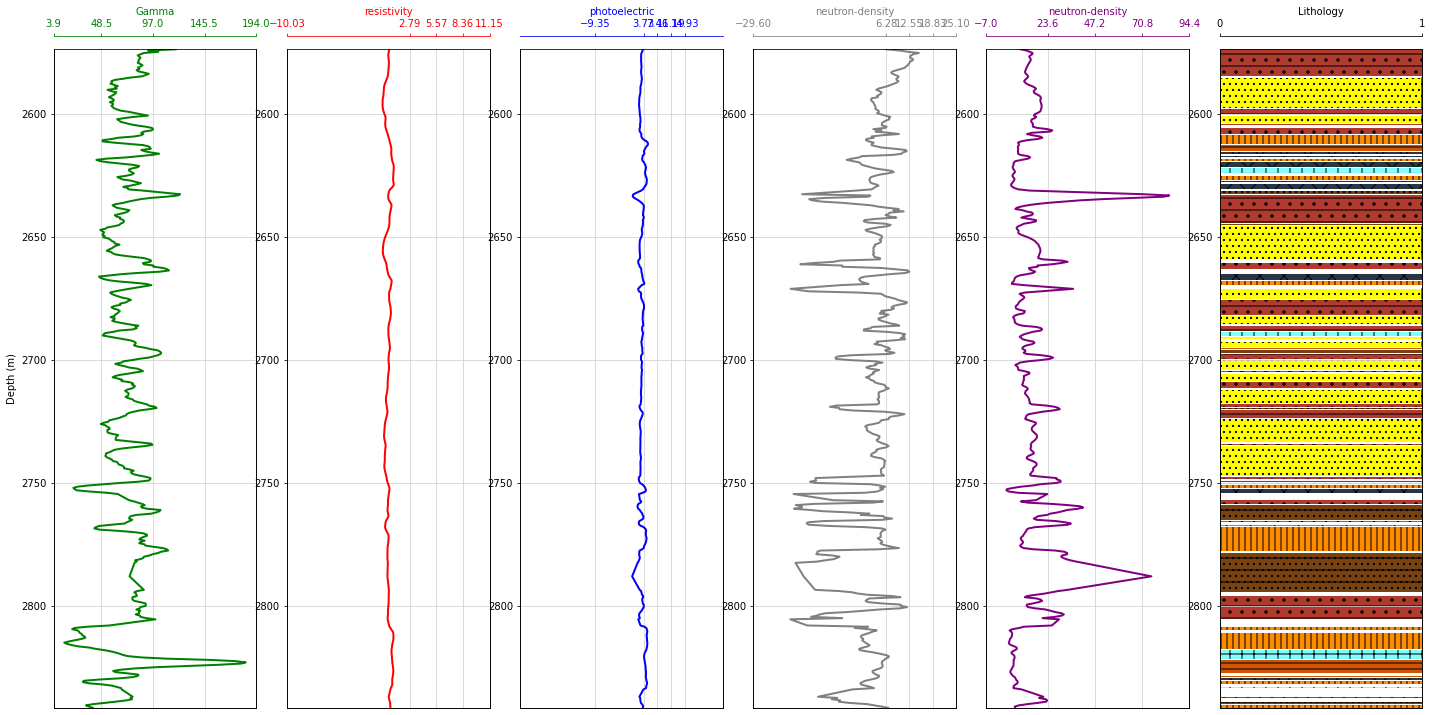

In [32]:
log_well(set2.sort_values("Depth"), set2['Depth'].min(), set2['Depth'].max())

##display logs for well number2

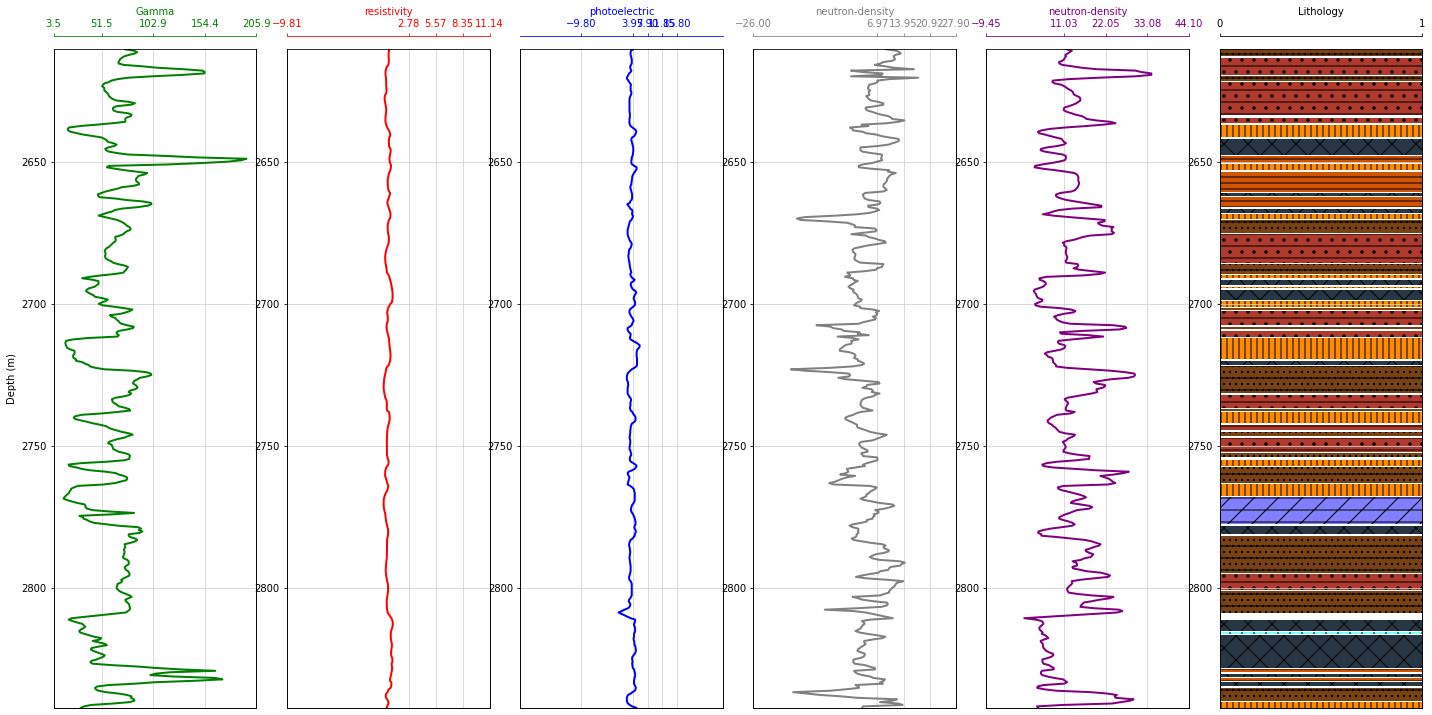

In [33]:
log_well(set3.sort_values("Depth"), set3['Depth'].min(), set3['Depth'].max())

##display logs for well number3

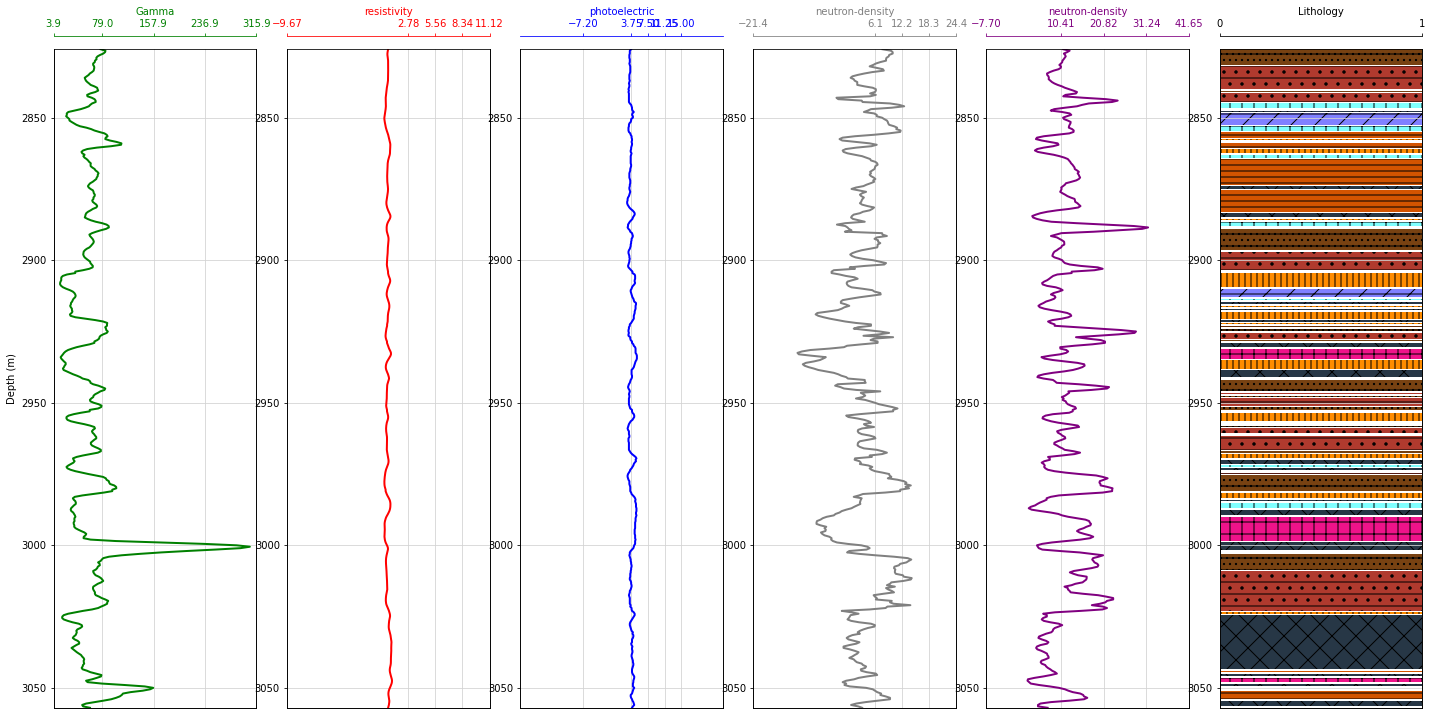

In [34]:
log_well(set4.sort_values("Depth"), set4['Depth'].min(), set4['Depth'].max())

##display logs for well number4

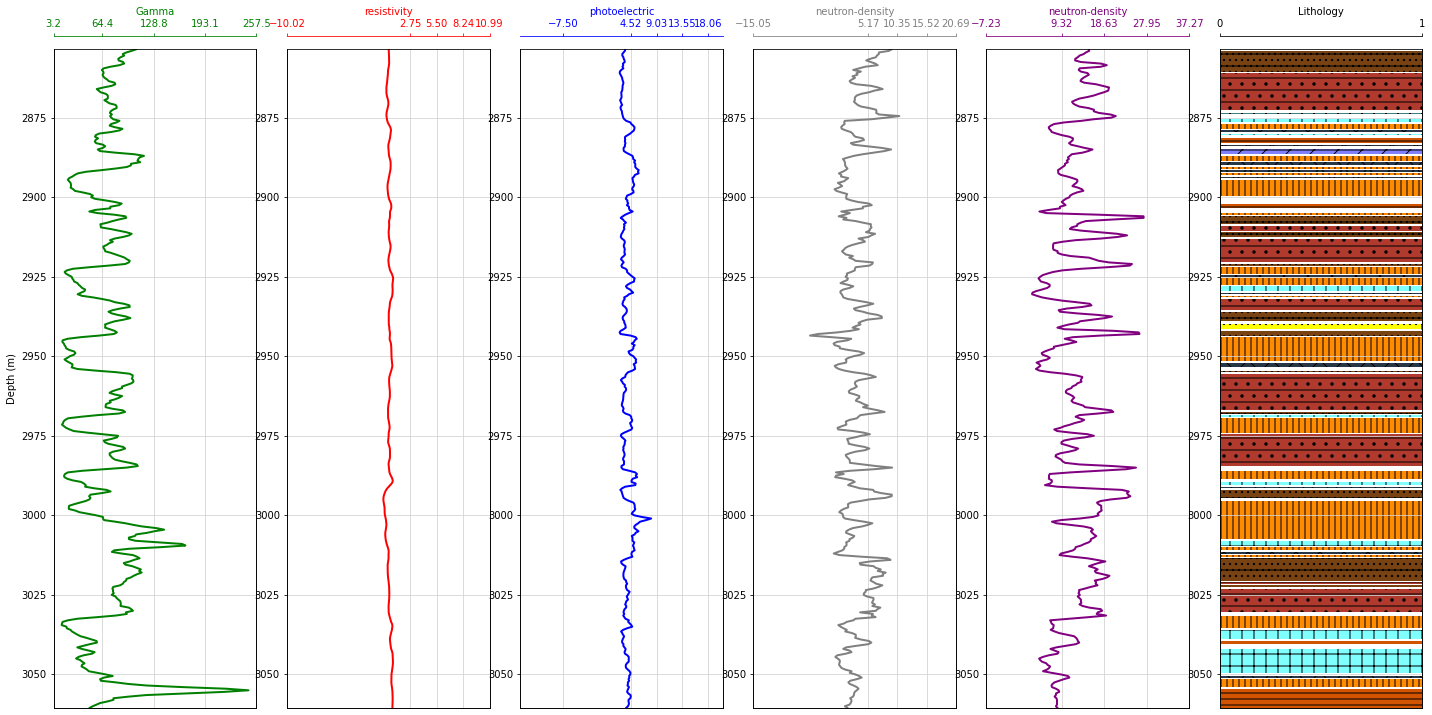

In [35]:
log_well(set5.sort_values("Depth"), set5['Depth'].min(), set5['Depth'].max())

##display logs for well number5

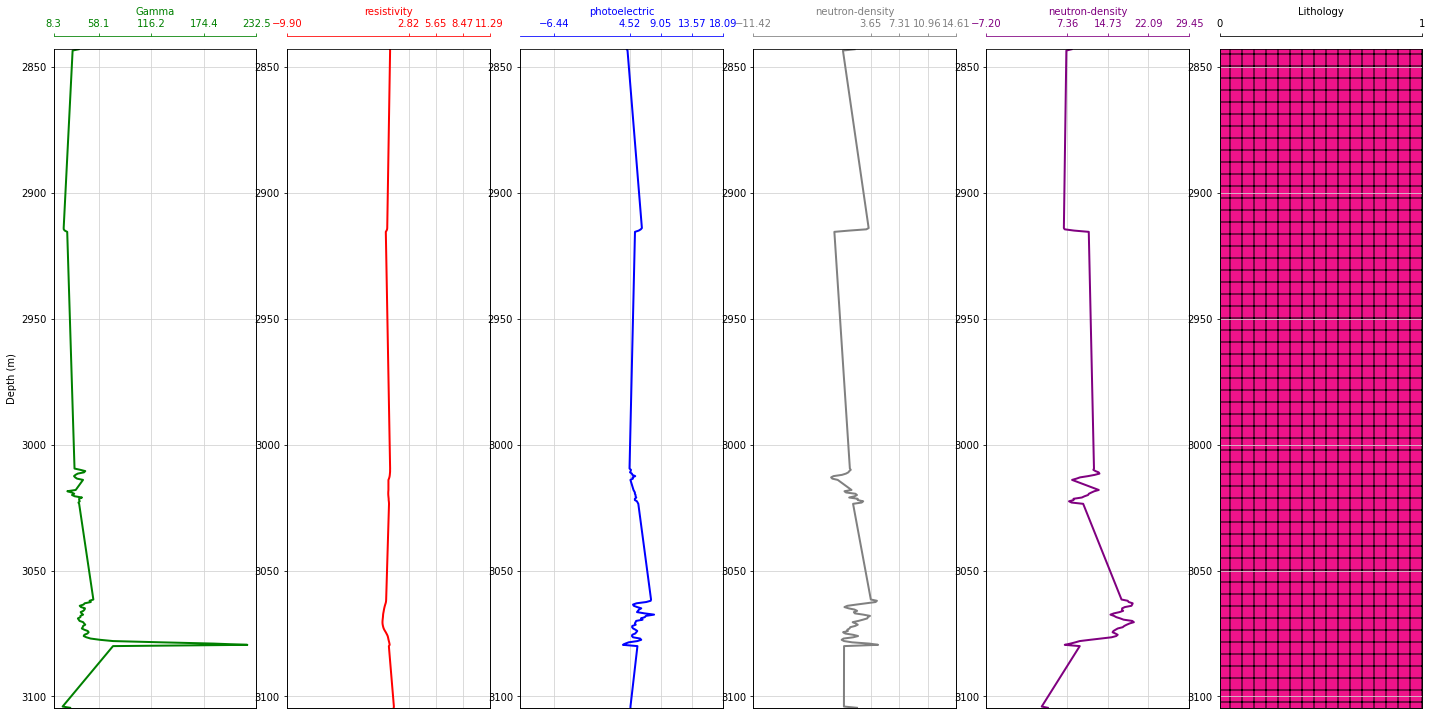

In [36]:
log_well(set6.sort_values("Depth"), set6['Depth'].min(), set6['Depth'].max())

##display logs for well number6

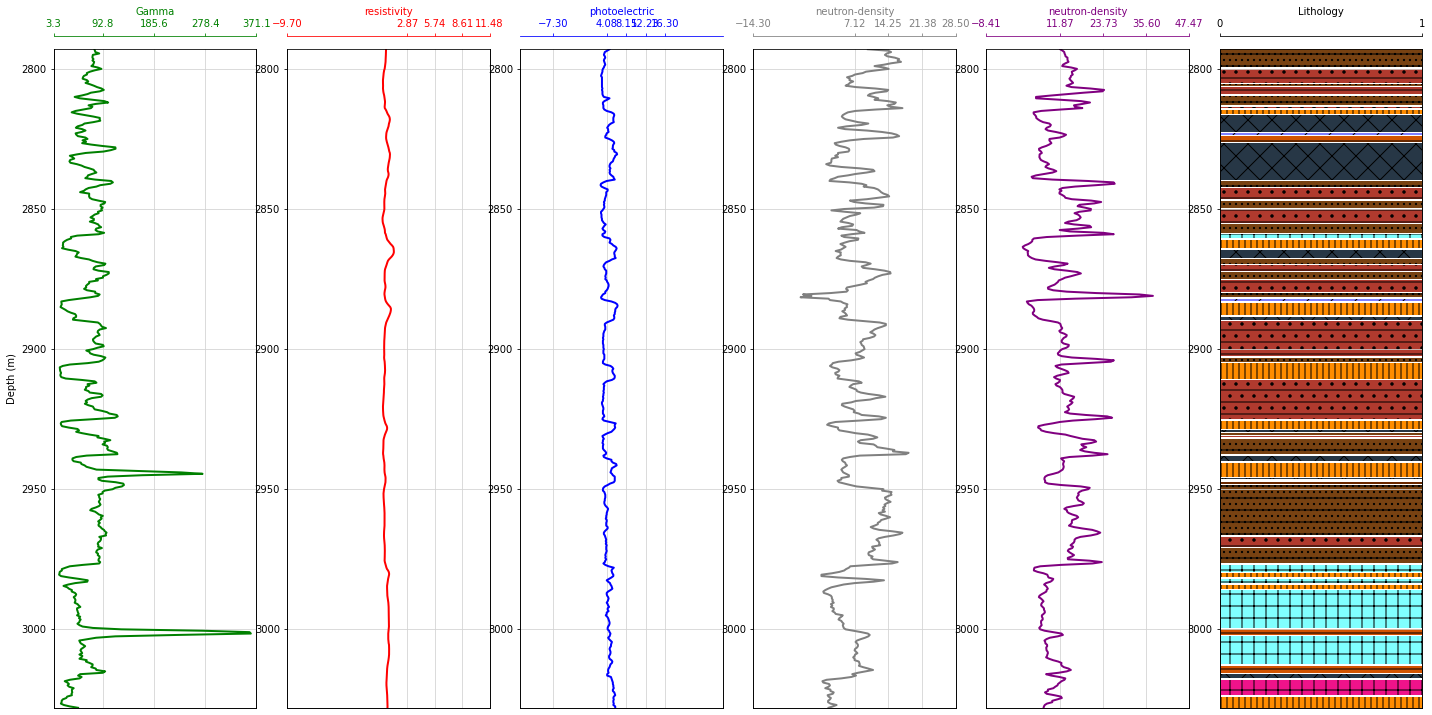

In [37]:
log_well(set7.sort_values("Depth"), set7['Depth'].min(), set7['Depth'].max())

##display logs for well number7

##display logs for well test

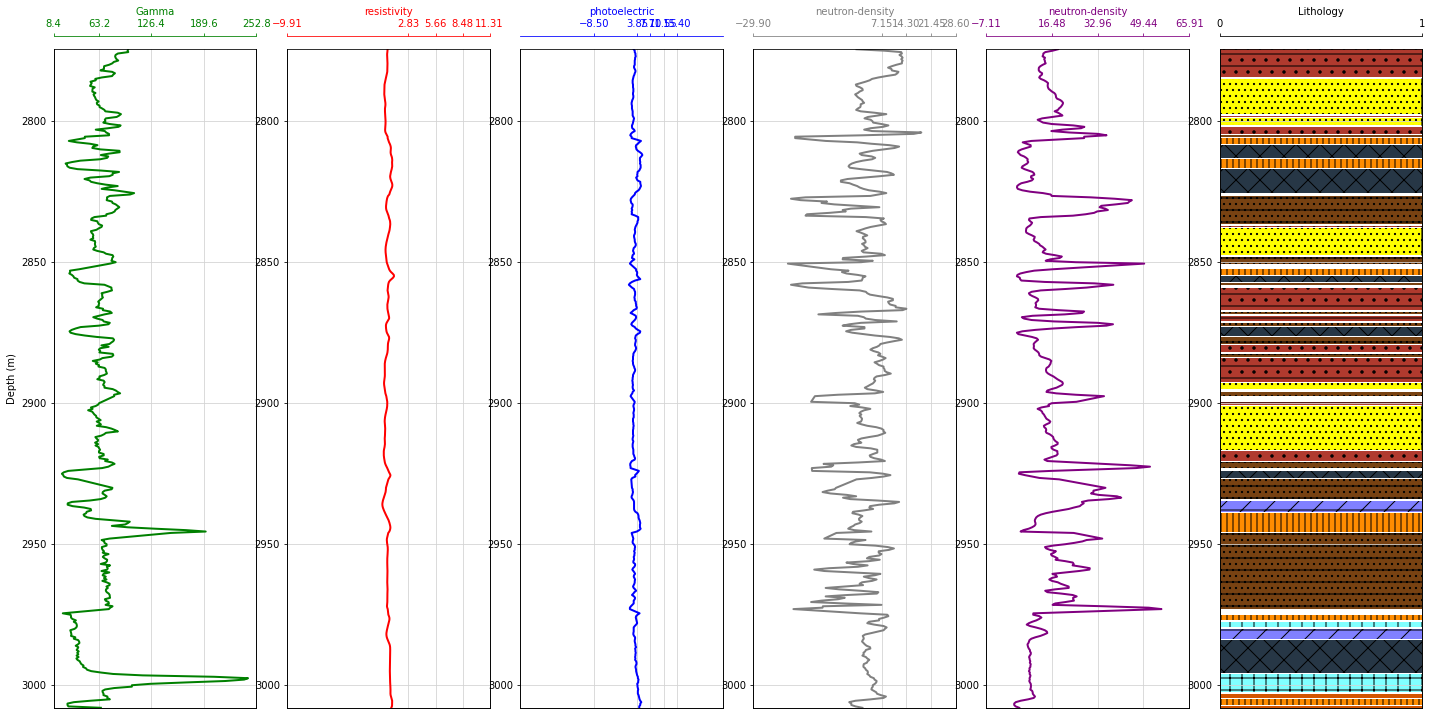

In [38]:
log_well(test_well.sort_values("Depth"), blind_df['Depth'].min(), blind_df['Depth'].max())

##sample pairplot

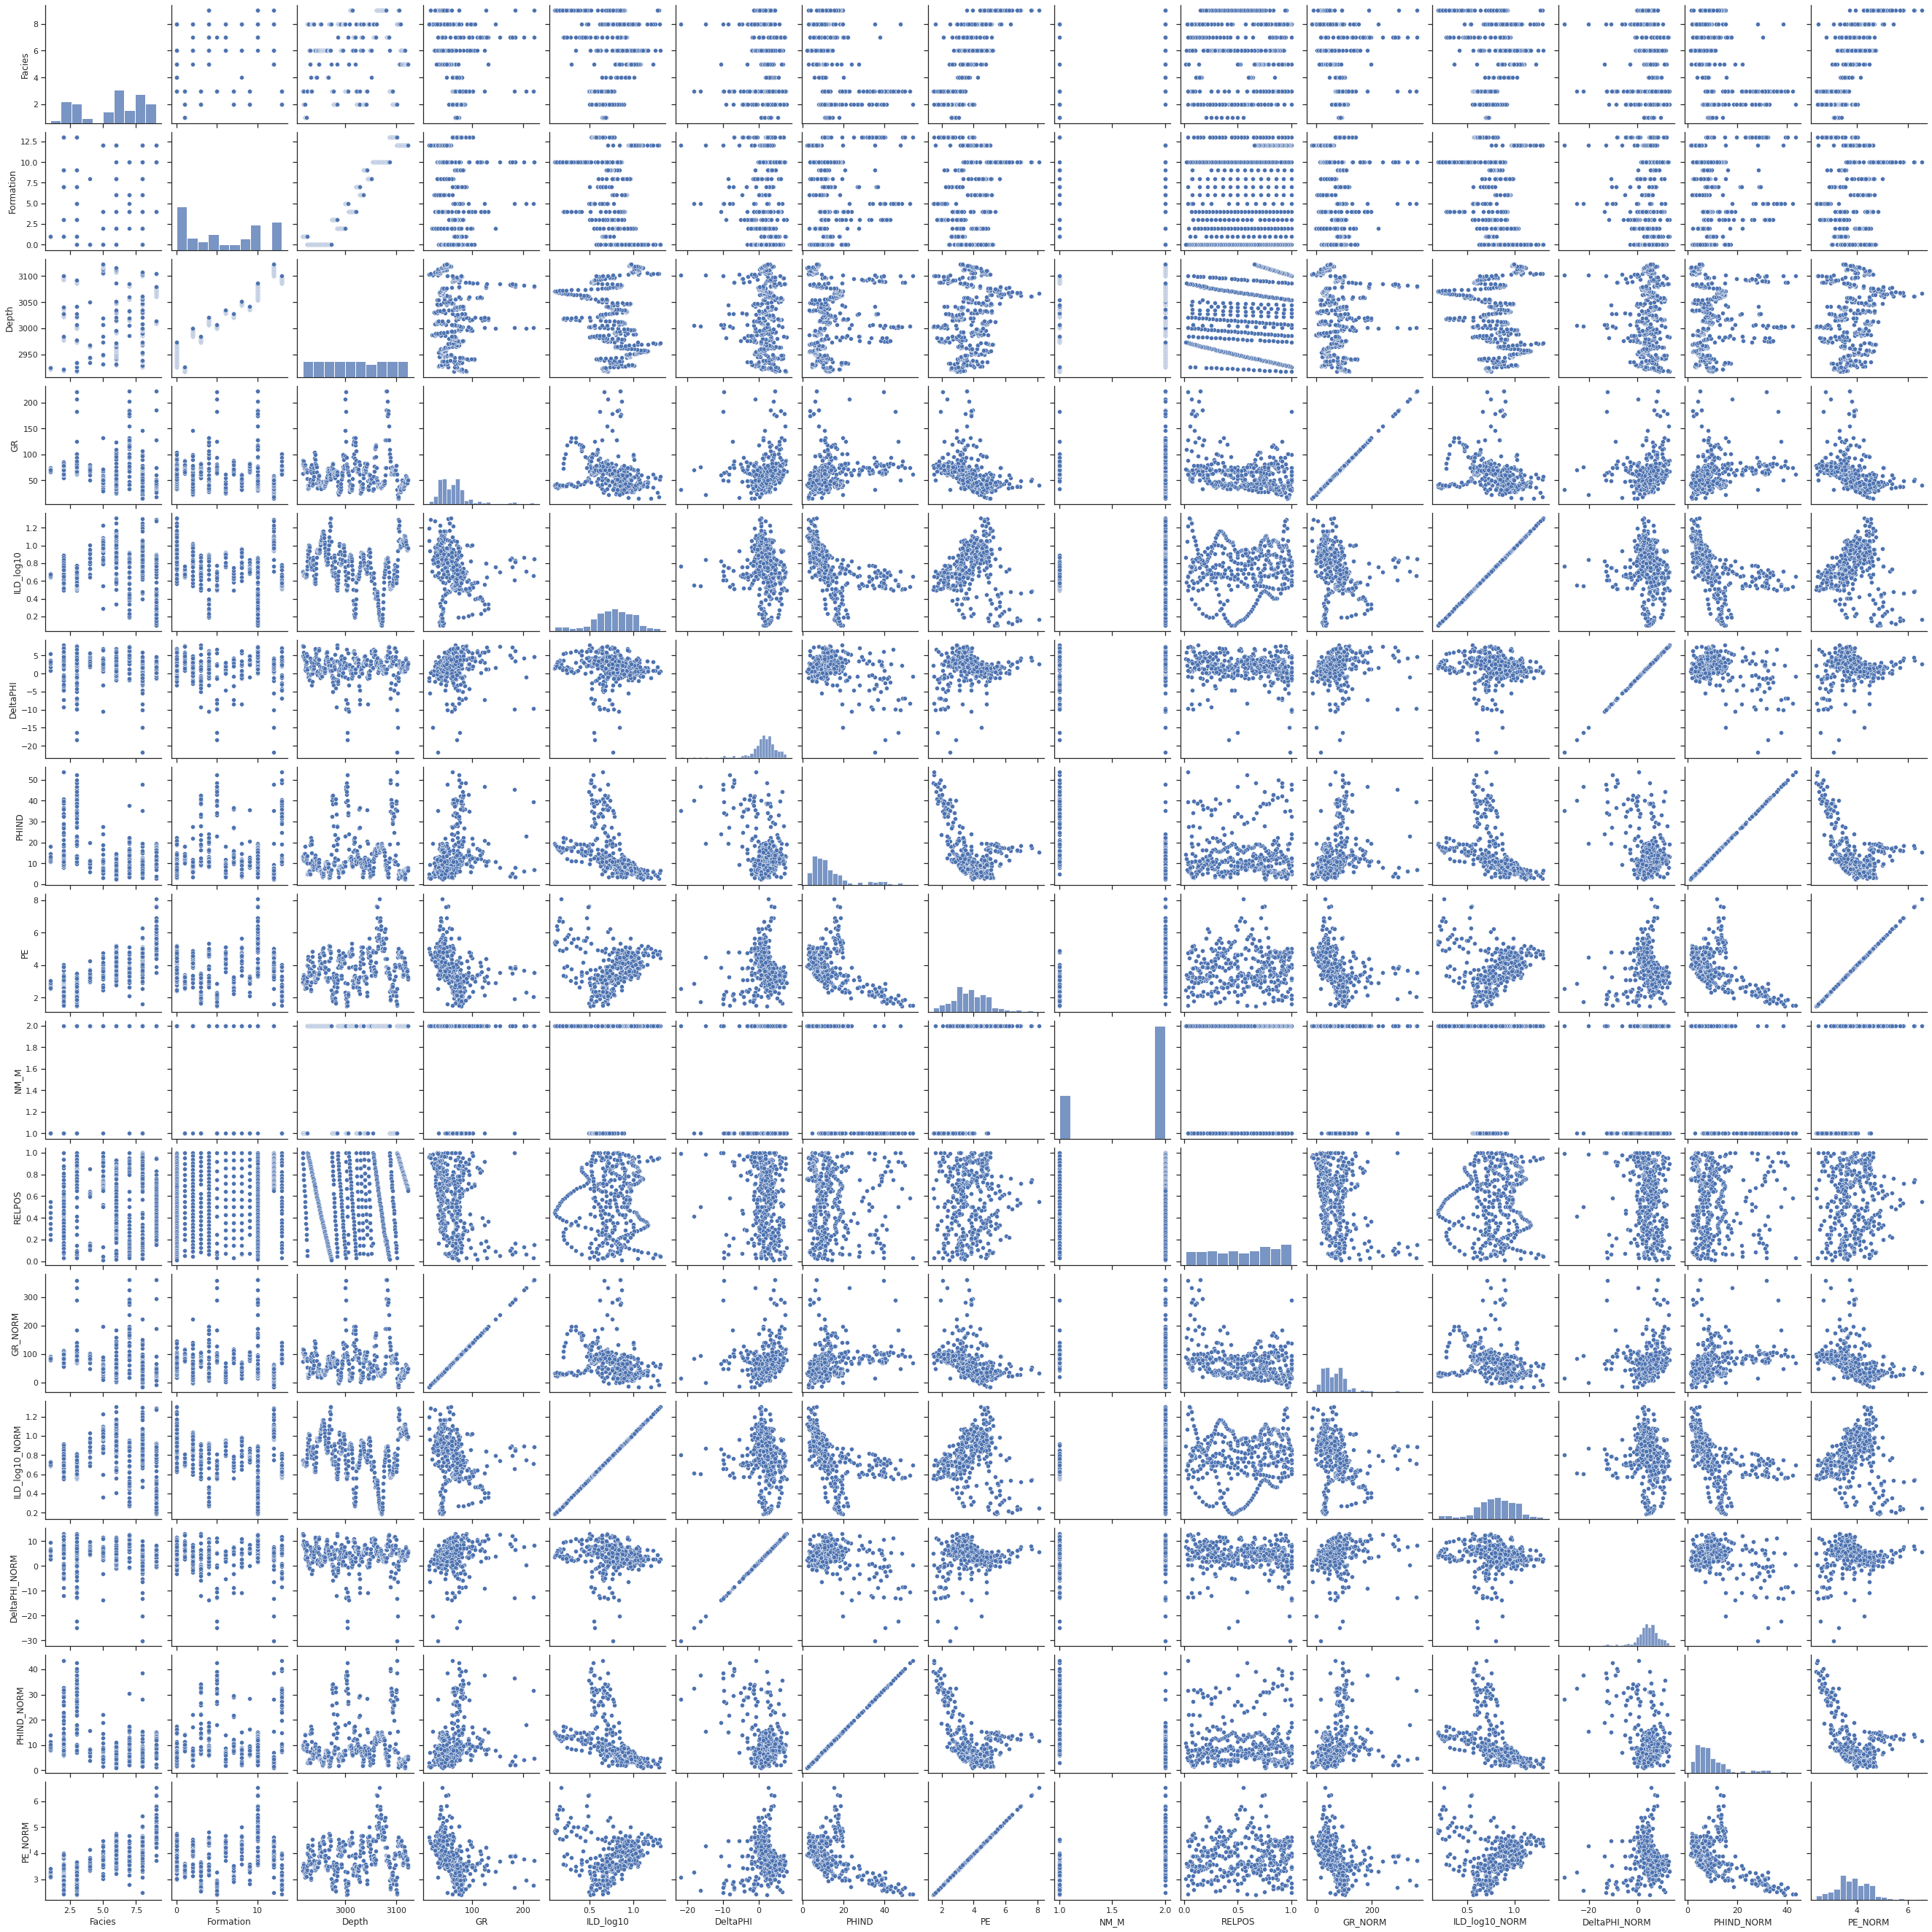

In [39]:
sns.set_theme(style="ticks")
sns.pairplot(set1.sort_values("Depth"))

#We Separate data to target and label 

##Separate target

In [22]:
X_train = train_set.drop(labels="Facies", axis=1)
Y_train = train_set['Facies']

##Separate label

In [23]:
X_test = blind_df.drop(labels="Facies", axis=1).values
Y_test = blind_df['Facies'].values

#Preprocessing

In [24]:
X_train_scaler = preprocessing.StandardScaler().fit_transform(X_train)
X_test_scaler =preprocessing.StandardScaler().fit_transform(X_test)

#grid search for best parameters

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [26]:
parameters = {'kernel':['rbf'],
              'C' : [1.e-03, 1.e-02, 1.e-01, 1.e+00,],
              'gamma' : [0.1,0.5,1,5,10],
              'degree' :[0.1,0.3,1,3,10,30]
              }
#, 'poly'

In [45]:
gsh = GridSearchCV(SVC(), param_grid=parameters,scoring='accuracy', cv=2, n_jobs=-1, verbose=10)

In [46]:
gsh.fit(X_train_scaler, Y_train)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0],
                         'degree': [0.1, 0.3, 1, 3, 10, 30],
                         'gamma': [0.1, 0.5, 1, 5, 10], 'kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [47]:
gsh.best_params_

{'C': 1.0, 'degree': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

#fit data for svc

In [27]:
gsh = SVC(kernel = 'rbf', C = 1, gamma = 0.1, degree = 0.1)
gsh.fit(X_train_scaler, Y_train)
Y_test_ = gsh.predict(X_test_scaler)

#validation

##confusion_matrix for test data

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_test_)

array([[25, 64,  0,  0,  0,  0,  0,  0],
       [ 6, 76,  7,  0,  0,  0,  0,  0],
       [ 0, 30, 87,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  4,  0,  0,  2],
       [ 0,  0,  0,  4,  6,  5,  1,  3],
       [ 0,  0,  1,  1,  0, 60,  0,  9],
       [ 0,  0,  0,  0,  0,  2, 15,  0],
       [ 0,  0,  0,  0,  0,  6,  0, 34]])

##classification_report for test data

In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_))

              precision    recall  f1-score   support

           1       0.81      0.28      0.42        89
           2       0.45      0.85      0.59        89
           3       0.92      0.74      0.82       117
           4       0.17      0.14      0.15         7
           5       0.60      0.32      0.41        19
           6       0.82      0.85      0.83        71
           7       0.94      0.88      0.91        17
           8       0.71      0.85      0.77        40

    accuracy                           0.68       449
   macro avg       0.68      0.61      0.61       449
weighted avg       0.74      0.68      0.67       449



##confusion_matrix for train data

In [30]:
Y_test_train = gsh.predict(X_train_scaler)
confusion_matrix(Y_train, Y_test_train)


array([[171,  87,   1,   0,   0,   0,   0,   0,   0],
       [ 25, 577, 130,   3,   0,   2,   0,   1,   0],
       [  7, 156, 438,   5,   1,   5,   0,   3,   0],
       [  0,   3,   2, 115,  12,  46,   0,   6,   0],
       [  3,   4,   4,  16,  63,  91,   5,  31,   0],
       [  0,   0,   2,  22,  11, 341,   6,  80,   0],
       [  0,   1,   0,   6,   0,   6,  73,  12,   0],
       [  0,   5,   7,   8,   9, 110,   4, 354,   1],
       [  0,   0,   0,   1,   0,   6,   2,  33,  51]])

##classification_report for train data

In [31]:
print(classification_report(Y_train, Y_test_train))

              precision    recall  f1-score   support

           1       0.83      0.66      0.74       259
           2       0.69      0.78      0.73       738
           3       0.75      0.71      0.73       615
           4       0.65      0.62      0.64       184
           5       0.66      0.29      0.40       217
           6       0.56      0.74      0.64       462
           7       0.81      0.74      0.78        98
           8       0.68      0.71      0.70       498
           9       0.98      0.55      0.70        93

    accuracy                           0.69      3164
   macro avg       0.74      0.65      0.67      3164
weighted avg       0.70      0.69      0.69      3164



In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print(accuracy_score(Y_test, Y_test_))

0.6770601336302895
